# CTG Quantitative Analysis #2: The relationship between fluency (perplexity) and control (BERT accuracy)

In [1]:
# Imports
%matplotlib inline

import pandas as pd
import numpy as np
from pdb import set_trace
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# GLOBAL VARIABLES
PLOT_DIMS = (11.7, 8.27)
TITLE_SIZE = 30
LABEL_SIZE = 25
TICK_SIZE=20
CI=90
ERR_STYLE='bars'

In [ ]:
# # read csv of ctg results of a certain configuration/pplm-setups
# # best performing GPT2-discrim and GPT2-bow
# gpt2_disc_unp_y = pd.read_csv("../output/ctg_out_am_discrim_pm_gpt2-medium_wl_NA_age_young_WS.csv", encoding="utf-8")
# gpt2_disc_unp_o = pd.read_csv("../output/ctg_out_am_discrim_pm_gpt2-medium_wl_NA_age_old_WS.csv", encoding="utf-8")
# gpt2_bow_fb85_y = pd.read_csv("../output/ctg_out_am_bow_pm_gpt2-medium_wl_bnc_young_mcwu_ws_pct_85_age_young_WS.csv", encoding="utf-8")
# gpt2_bow_fb85_o = pd.read_csv("../output/ctg_out_am_bow_pm_gpt2-medium_wl_bnc_old_mcwu_ws_pct_85_age_old_WS.csv", encoding="utf-8")
# # And DGPT-discrim prompted
# dgpt_disc_pr_y = pd.read_csv("../output/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_wl_NA_age_young_WS.csv")
# dgpt_disc_pr_o = pd.read_csv("../output/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_wl_NA_age_old_WS.csv")

In [3]:
# Neutral prompted results
# GPT2-Discrim
gpt2_disc_np_y = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_discrim_pm_gpt2-medium_prompt_neutral_wl_NA_age_young_WS.csv", encoding="utf-8")
gpt2_disc_np_o = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_discrim_pm_gpt2-medium_prompt_neutral_wl_NA_age_old_WS.csv", encoding="utf-8")

# GPT2-BoW-FB
gpt2_bow_fb_np_y = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_bow_pm_gpt2-medium_prompt_neutral_wl_bnc_young_mcwu_ws_pct_85_age_young_WS.csv", encoding="utf-8")
gpt2_bow_fb_np_o = pd.read_csv("../output/neutral_prompt/gpt2-medium/ctg_out_am_bow_pm_gpt2-medium_prompt_neutral_wl_bnc_old_mcwu_ws_pct_85_age_old_WS.csv", encoding="utf-8")

# DGPT-Discrim
dgpt_disc_np_y = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_NA_age_young_WS.csv", encoding="utf-8")
dgpt_disc_np_o = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_discrim_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_NA_age_old_WS.csv", encoding="utf-8")

# DGPT-BoW-MIU
dgpt_bow_miu_np_y = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_bow_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_bnc_rb_WS_100_mi_unigrams_young_age_young_WS.csv", encoding="utf-8")
dgpt_bow_miu_np_o = pd.read_csv("../output/neutral_prompt/microsoft-DialoGPT-medium/ctg_out_am_bow_pm_microsoft-DialoGPT-medium_prompt_neutral_wl_bnc_rb_WS_100_mi_unigrams_old_age_old_WS.csv", encoding="utf-8")

In [4]:
# Drop first 30 rows because sequences too short
gpt2_disc_np_y = gpt2_disc_np_y.iloc[30:] 
gpt2_disc_np_o = gpt2_disc_np_o.iloc[30:]

gpt2_bow_fb_np_y = gpt2_bow_fb_np_y.iloc[30:]
gpt2_bow_fb_np_o = gpt2_bow_fb_np_o.iloc[30:]

dgpt_disc_np_y = dgpt_disc_np_y.iloc[30:]
dgpt_disc_np_o = dgpt_disc_np_o.iloc[30:]

dgpt_bow_miu_np_y = dgpt_bow_miu_np_y.iloc[30:]
dgpt_bow_miu_np_o = dgpt_bow_miu_np_o.iloc[30:]

In [5]:
# Verify that perplexities agree with table in overleaf
print("GPT2-Disc Y/O ppl")
print(gpt2_disc_np_y.perplexity.mean())
print(gpt2_disc_np_o.perplexity.mean())

print("GPT2-BoW-FB Y/O ppl")
print(gpt2_bow_fb_np_y.perplexity.mean())
print(gpt2_bow_fb_np_o.perplexity.mean())

print("DGPT-Disc Y/O ppl")
print(dgpt_disc_np_y.perplexity.mean())
print(dgpt_disc_np_o.perplexity.mean())

print("DGPT-BoW-MIU Y/O ppl")
print(dgpt_bow_miu_np_y.perplexity.mean())
print(dgpt_bow_miu_np_o.perplexity.mean())

GPT2-Disc Y/O ppl
32.0906511147817
47.149694545561495
GPT2-BoW-FB Y/O ppl
27.91258231268989
27.583914594297056
DGPT-Disc Y/O ppl
42.005378170084334
41.17472008599175
DGPT-BoW-MIU Y/O ppl
38.66622588546188
37.90971698054561


In [6]:
def add_correct_col(prob):
    '''
    Adds column to ctg results dataframe indicating if BERT correctly classified generated sequence. 1 if correct, 0 otherwise.
    Args:
        prob (float): assigned probability of belonging to relevant age group
    '''
    
    assert 0 <= prob <= 1
    
    return 1 if prob >= 0.5 else 0
    

In [7]:
# Add correct column
gpt2_disc_np_y['correct'] = gpt2_disc_np_y['young_prob'].apply(add_correct_col)
gpt2_disc_np_o['correct'] = gpt2_disc_np_o['old_prob'].apply(add_correct_col)

gpt2_bow_fb_np_y['correct'] = gpt2_bow_fb_np_y['young_prob'].apply(add_correct_col)
gpt2_bow_fb_np_o['correct'] = gpt2_bow_fb_np_o['old_prob'].apply(add_correct_col)

dgpt_disc_np_y['correct'] = dgpt_disc_np_y['young_prob'].apply(add_correct_col)
dgpt_disc_np_o['correct'] = dgpt_disc_np_o['old_prob'].apply(add_correct_col)

dgpt_bow_miu_np_y['correct'] = dgpt_bow_miu_np_y['young_prob'].apply(add_correct_col)
dgpt_bow_miu_np_o['correct'] = dgpt_bow_miu_np_o['old_prob'].apply(add_correct_col)

In [8]:
print("GPT2-Disc Y/O acc")
print(gpt2_disc_np_y.correct.mean())
print(gpt2_disc_np_o.correct.mean())

print("GPT2-BoW-FB Y/O acc")
print(gpt2_bow_fb_np_y.correct.mean())
print(gpt2_bow_fb_np_o.correct.mean())

print("DGPT-Disc Y/O acc")
print(dgpt_disc_np_y.correct.mean())
print(dgpt_disc_np_o.correct.mean())

print("DGPT-BoW-MIU Y/O acc")
print(dgpt_bow_miu_np_y.correct.mean())
print(dgpt_bow_miu_np_o.correct.mean())

GPT2-Disc Y/O acc
0.6777777777777778
0.7434944237918215
GPT2-BoW-FB Y/O acc
0.7037037037037037
0.42962962962962964
DGPT-Disc Y/O acc
0.8587360594795539
0.5666666666666667
DGPT-BoW-MIU Y/O acc
0.8851851851851852
0.21851851851851853


In [9]:
# gpt2_disc_unp_o['perplexity'].describe()

In [178]:
# Binning the data
# bins = [0, 20, 30, 40, 50, 500]
bins = [0, 25, 50, 500]
bin_labels = ["0-25", "25-50", "50+"]
# bin_labels = ["0-20", "20-30", "30-40", "40-50", "50+"]
gpt2_disc_np_y['ppl_binned'] = pd.cut(gpt2_disc_np_y['perplexity'], bins=bins, labels=bin_labels)
gpt2_disc_np_o['ppl_binned'] = pd.cut(gpt2_disc_np_o['perplexity'], bins=bins, labels=bin_labels)

gpt2_bow_fb_np_y['ppl_binned'] = pd.cut(gpt2_bow_fb_np_y['perplexity'], bins=bins, labels=bin_labels)
gpt2_bow_fb_np_o['ppl_binned'] = pd.cut(gpt2_bow_fb_np_o['perplexity'], bins=bins, labels=bin_labels)

dgpt_disc_np_y['ppl_binned'] = pd.cut(dgpt_disc_np_y['perplexity'], bins=bins, labels=bin_labels)
dgpt_disc_np_o['ppl_binned'] = pd.cut(dgpt_disc_np_o['perplexity'], bins=bins, labels=bin_labels)

dgpt_bow_miu_np_y['ppl_binned'] = pd.cut(dgpt_bow_miu_np_y['perplexity'], bins=bins, labels=bin_labels)
dgpt_bow_miu_np_o['ppl_binned'] = pd.cut(dgpt_bow_miu_np_o['perplexity'], bins=bins, labels=bin_labels)

In [179]:
gpt2_disc_np_y['ppl_binned'].value_counts()

25-50    141
0-25     104
50+       25
Name: ppl_binned, dtype: int64

In [180]:
gpt2_disc_np_o['ppl_binned'].value_counts()

0-25     99
25-50    89
50+      81
Name: ppl_binned, dtype: int64

In [181]:
gpt2_disc_np_o['perplexity'].describe()

count    269.000000
mean      47.149695
std       47.561300
min        8.221839
25%       22.840796
50%       30.318062
75%       57.383289
max      425.673370
Name: perplexity, dtype: float64

In [182]:
gpt2_bow_fb_np_y['ppl_binned'].value_counts()

25-50    159
0-25     106
50+        5
Name: ppl_binned, dtype: int64

In [183]:
gpt2_bow_fb_np_o['ppl_binned'].value_counts()

25-50    149
0-25     116
50+        5
Name: ppl_binned, dtype: int64

In [184]:
dgpt_disc_np_y['ppl_binned'].value_counts()

25-50    206
50+       46
0-25      17
Name: ppl_binned, dtype: int64

In [185]:
dgpt_disc_np_o['ppl_binned'].value_counts()

25-50    213
50+       40
0-25      17
Name: ppl_binned, dtype: int64

In [186]:
dgpt_bow_miu_np_y['ppl_binned'].value_counts()

25-50    240
50+       27
0-25       3
Name: ppl_binned, dtype: int64

In [187]:
dgpt_bow_miu_np_o['ppl_binned'].value_counts()

25-50    232
50+       29
0-25       9
Name: ppl_binned, dtype: int64

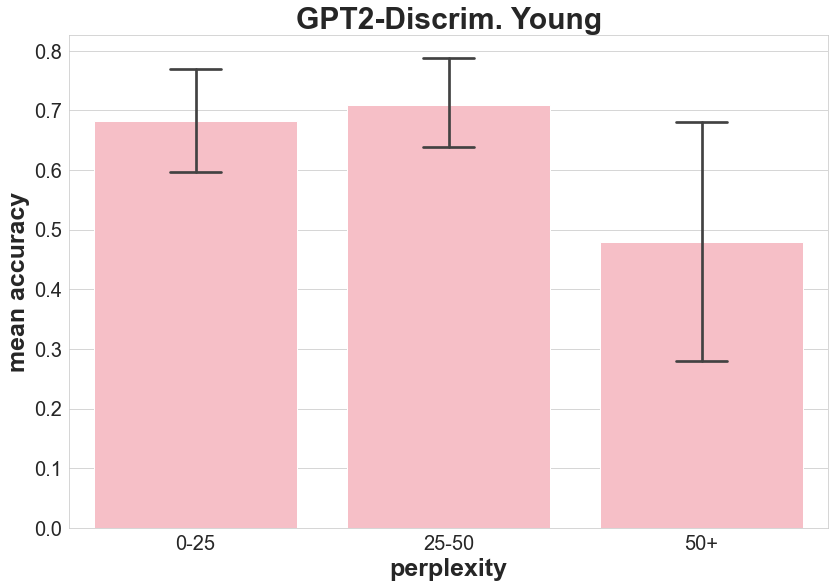

In [204]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.boxplot(data=gpt2_disc_np_y, x='perplexity', y='young_prob')

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', capsize=0.2, color="lightpink")

# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("GPT2-Discrim. Young", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

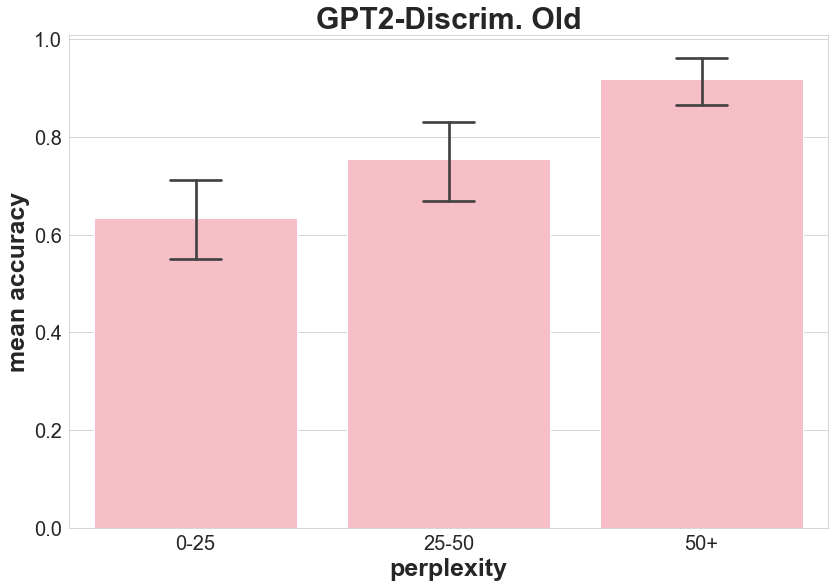

In [189]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("GPT2-Discrim. Old", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

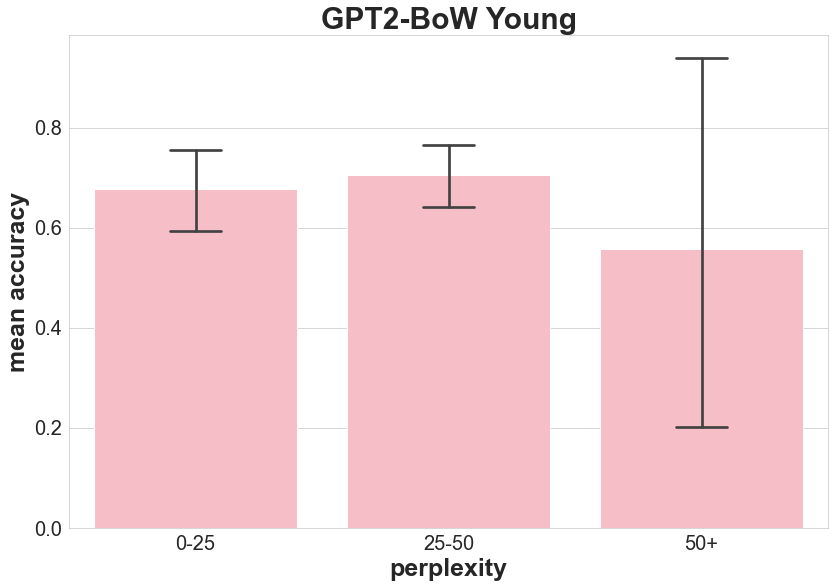

In [190]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("GPT2-BoW Young", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

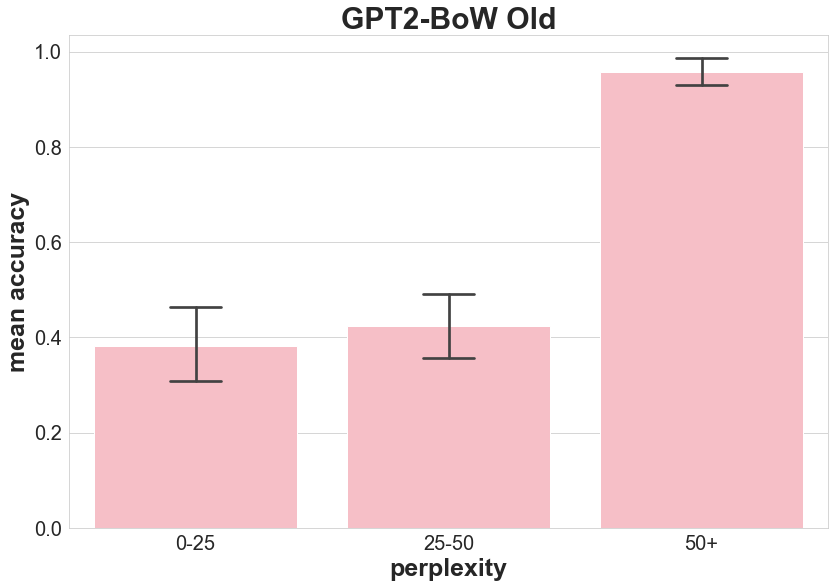

In [191]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("GPT2-BoW Old", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

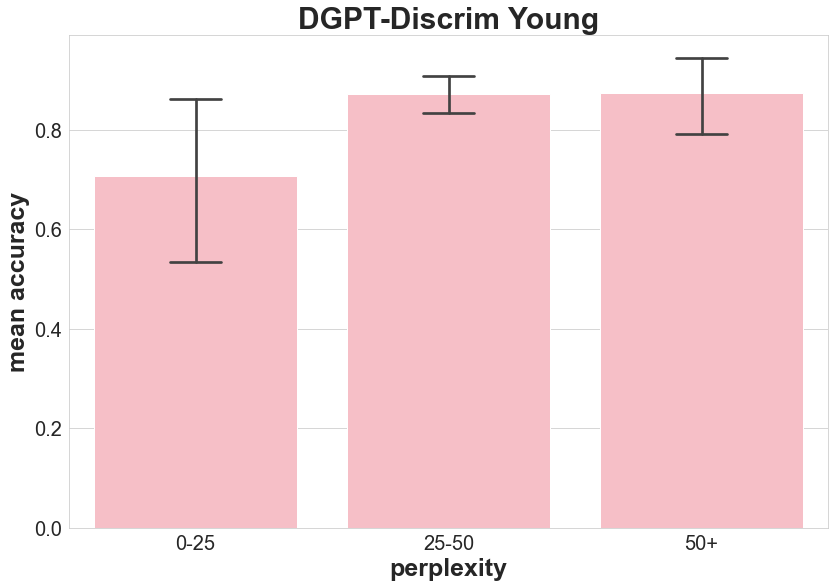

In [192]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

sns.barplot(data=dgpt_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")
# 
# sns.barplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("DGPT-Discrim Young", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

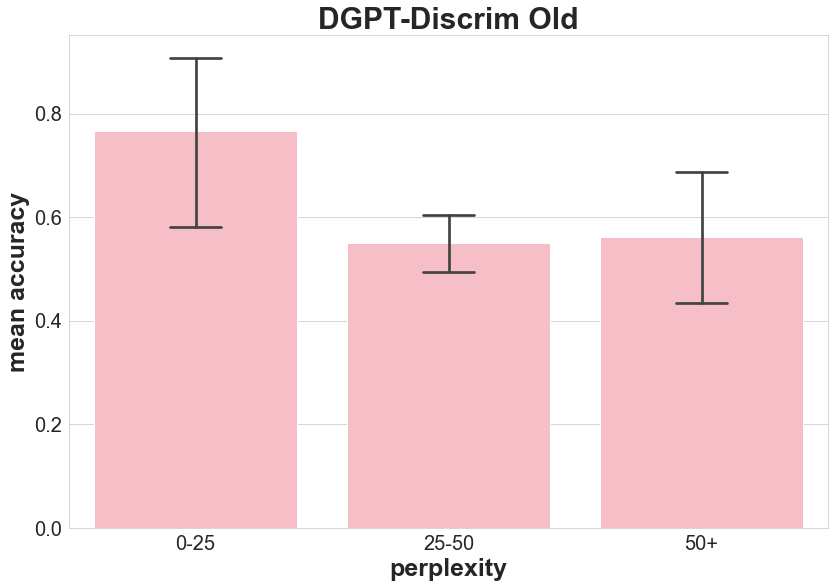

In [193]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.barplot(data=dgpt_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
sns.barplot(data=dgpt_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")
# 
# sns.barplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("DGPT-Discrim Old", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

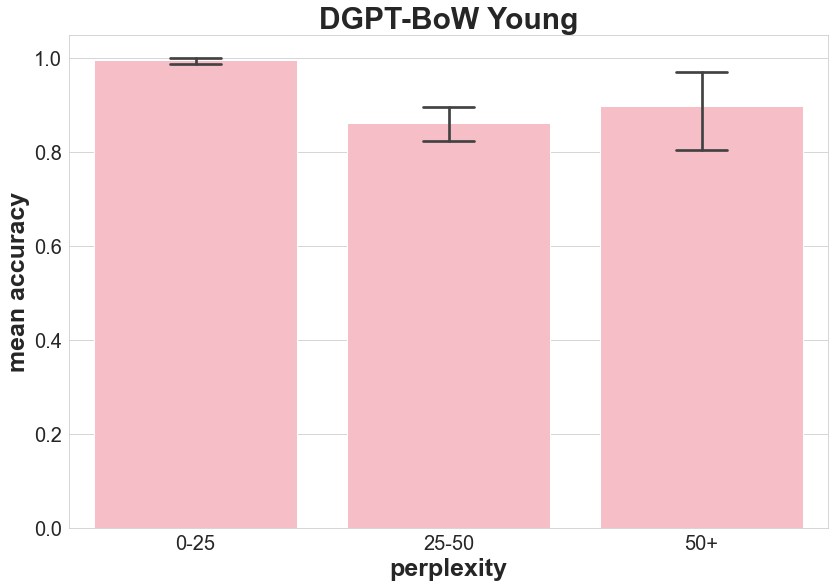

In [194]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.barplot(data=dgpt_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")
# 
sns.barplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("DGPT-BoW Young", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

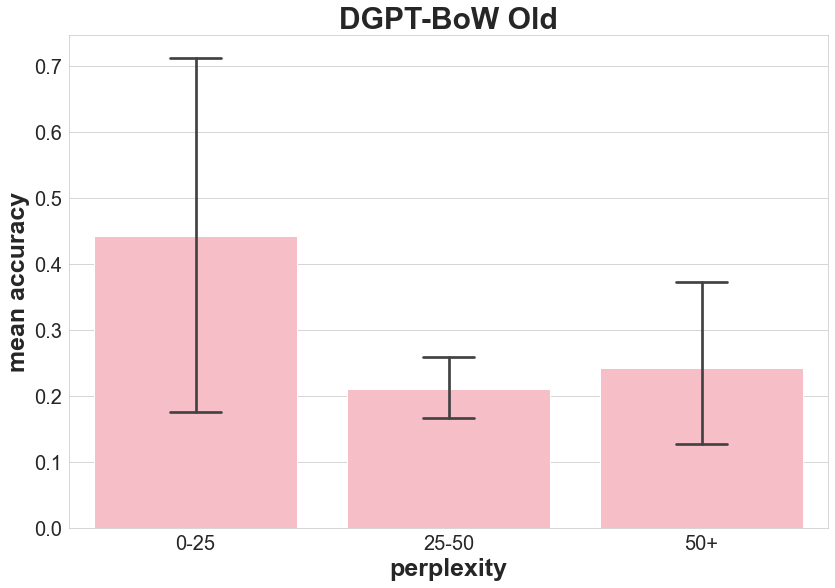

In [195]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

# sns.barplot(data=gpt2_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.05, color="lightpink")
# sns.barplot(data=gpt2_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.05, color="lightpink")

# sns.barplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='young_prob', capsize=0.1, color="lightpink")
# sns.barplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.barplot(data=dgpt_disc_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
# sns.barplot(data=dgpt_disc_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")
# 
# sns.barplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='young_prob', capsize=0.2, color="lightpink")
sns.barplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='old_prob', capsize=0.2, color="lightpink")

# sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=0, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("DGPT-BoW Old", fontsize = TITLE_SIZE, weight='bold')
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

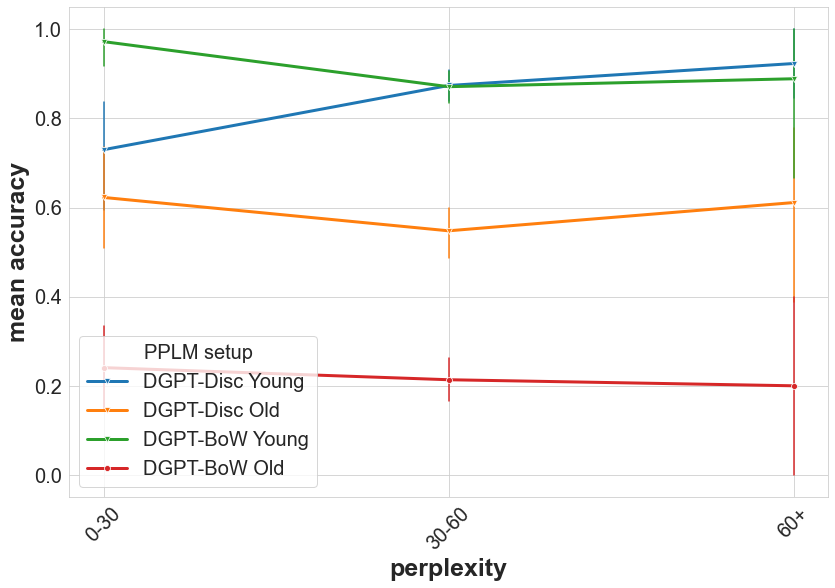

In [61]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")

# sns.lineplot(data=gpt2_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-Disc Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_disc_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-Disc Old', err_style=ERR_STYLE, linewidth=3)

# sns.lineplot(data=gpt2_bow_fb_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='GPT2-BoW Young', err_style=ERR_STYLE, linewidth=3)
# sns.lineplot(data=gpt2_bow_fb_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='GPT2-BoW Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_disc_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_disc_np_o, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-Disc Old', err_style=ERR_STYLE, linewidth=3)

sns.lineplot(data=dgpt_bow_miu_np_y, x='ppl_binned', y='correct', marker="v", ci=CI, label='DGPT-BoW Young', err_style=ERR_STYLE, linewidth=3)
sns.lineplot(data=dgpt_bow_miu_np_o, x='ppl_binned', y='correct', marker="o", ci=CI, label='DGPT-BoW Old', err_style=ERR_STYLE, linewidth=3)

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()
# plt.savefig(f'../figures/lineplot_ppl_acc_best_gpt2_disc_bow_ci_{CI}_errstyle_{ERR_STYLE}.png')

In [ ]:
plt.figure(figsize=PLOT_DIMS)
sns.set_style("whitegrid")
sns.barplot(data=gpt2_disc_unp_y, x='ppl_binned', y='correct')

plt.xticks(rotation=45, fontsize = TICK_SIZE)
plt.yticks(rotation = 0, fontsize = TICK_SIZE)
plt.title("", fontsize = TITLE_SIZE)
plt.xlabel("perplexity", fontsize = LABEL_SIZE, weight='bold')
plt.ylabel("mean accuracy", fontsize = LABEL_SIZE, weight='bold')
# plt.legend(title='PPLM setup', fontsize=TICK_SIZE, title_fontsize=TICK_SIZE)
# plt.legend([],[], frameon=False)
plt.tight_layout()